### JUAN DIEGO VIZCAINO_CLASSWORK_1

## PROBLEM 1

#### Part A:

In [1]:
#Importing the usual libraries: 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.optimize as opt
from scipy.constants import c,h,k

In [2]:
print(c,h,k)

299792458.0 6.62607015e-34 1.380649e-23


In [3]:
#creating the function: 
def read_time(r0,time):
    '''
    The function evaluates time data in the acceleration equations
    INPUT: time vector array and r0 
    OUTPUT: 4 objects continging the time and r0 evluated in the equations
    '''
    medium_1 = r0 + 10*time
    medium_2 = r0 + 3*time**2
    medium_3 = r0 - 12*time + 1.1*time**3 
    medium_4 = r0*np.exp(0.9*time)
    
    return medium_1 ,medium_2 ,medium_3 ,medium_4 

In [4]:
#Defining r0 as a global parameter: 
r0 = 10

#Creating the time vector that goes from 0-5 with 11 elements: 
time = np.linspace(0., 5., 11)

#checnkig the time vector has 11 elements 
#print(len(time))

In [5]:
#Testing the function: 

medium_1,medium_2,medium_3,medium_4 = read_time(r0,time)

#Checking the functions works:
#print(len(medium_1))
#print(medium_2)
#print(medium_3)
#print(medium_4)

#### Part B

In [6]:
#Defining the function: 
def circumference(radius,theta):
    '''
    The functions evalueste the radius and the angle theta in the eqautions to
    then obatain the (x,y) coordinates in the cartesian plane
    INPPUT: radius, angle (0 to 2pi)
    OUTPUt: coordinate (x,y)
    '''
    x = radius*np.cos(theta)
    y = radius*np.sin(theta)
    
    return x,y

#### Part C

In [7]:
#Creating the theta vecotor: 
theta = np.linspace(0,2*np.pi,100)

In [8]:
#testing the function: 
x,y = circumference(r0,theta)

#checking it works: 
#print(x)
#print(y)

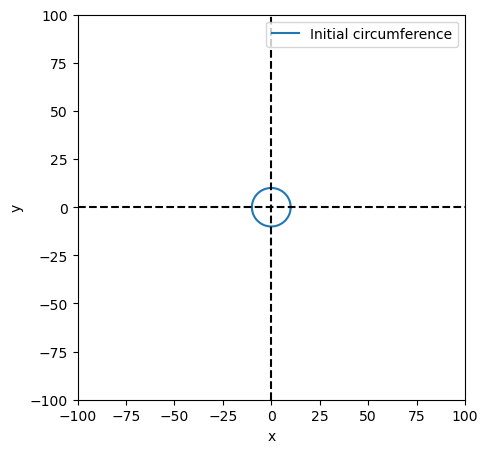

In [9]:
#Plotting: 

fig = plt.figure(figsize = (5,5))

plt.plot(x, y,label = "Initial circumference")
plt.axvline(x=0,linestyle = '--',color = 'black')
plt.axhline(y=0,linestyle = '--',color = 'black')

plt.xlabel("x")
plt.ylabel("y")

plt.xlim([-100, 100])
plt.ylim([-100, 100])
plt.legend()

plt.show()

#### Part D: 

In [10]:
#getting the rt's using the function in a: 
rt_1,rt_2,rt_3,rt_4 = read_time(r0,time)

In [11]:
#Defining emptys lists to save the values for x and y:
x_1,y_1 = [],[]
x_2,y_2 = [],[]
x_3,y_3 = [],[]
x_4,y_4 = [],[]

for i in range (len(rt_1)): 
    #Getting the values of x and y for each of the 11 radius of the lists:
    xC_1,yC_1 = np.array(circumference(rt_1[i],theta))
    xC_2,yC_2 = np.array(circumference(rt_2[i],theta))
    xC_3,yC_3 = np.array(circumference(rt_3[i],theta))
    xC_4,yC_4 = np.array(circumference(rt_4[i],theta))
    
    #appending the values of eahc iteration in the lists
    x_1.append(xC_1)
    y_1.append(yC_1)
    
    x_2.append(xC_2)
    y_2.append(yC_2)
    
    x_3.append(xC_3)
    y_3.append(yC_3)
    
    x_4.append(xC_4)
    y_4.append(yC_4)

#Checking it works:
#print(x_1)
#print(len(x_1))
#print(len(x_1[0]))

####  Part E

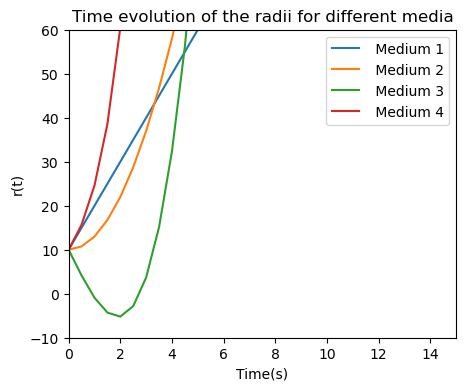

In [12]:
#Plotting: 

fig = plt.figure(figsize = (5,4))
plt.title('Time evolution of the radii for different media')
plt.plot(time,rt_1,label = " Medium 1")
plt.plot(time,rt_2,label = " Medium 2")
plt.plot(time,rt_3,label = " Medium 3")
plt.plot(time,rt_4,label = " Medium 4")

plt.xlabel("Time(s)")
plt.ylabel("r(t)")
plt.xlim(0,15)
plt.ylim(-10,60)
plt.legend()

plt.show()

#### Part F

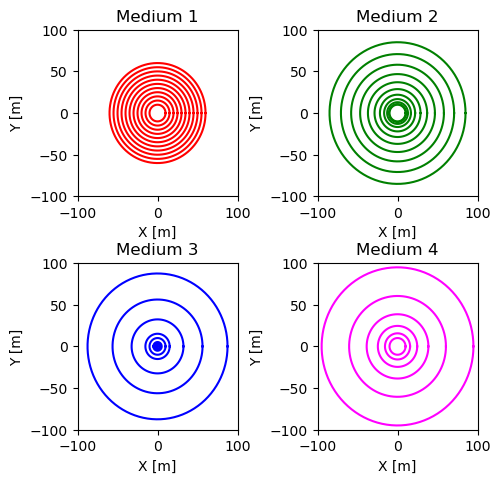

In [13]:
#PLotting

plt.figure(figsize = (5,5))
fig.tight_layout(pad=8.0)
#Plot for medium 1 
plt.subplot(2, 2, 1)
plt.title('Medium 1')
for i in range(len(x_1)):
    plt.plot(x_1[i], y_1[i], color = "red",label='Medium 1')
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')

#Plot for medium 2
plt.subplot(2, 2, 2)
plt.title('Medium 2')
for i in range(len(x_1)):
    plt.plot(x_2[i], y_2[i], color = "green",label='Medium 2' )
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')

#Plot for medium 3
plt.subplot(2, 2, 3)
plt.title('Medium 3')
for i in range(len(x_1)):
    plt.plot(x_3[i], y_3[i], color = "Blue",label='Medium 3')
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')

#Plot for medium 4
plt.subplot(2, 2, 4)
plt.title('Medium 4')
for i in range(len(x_1)):
    plt.plot(x_4[i], y_4[i], color = "magenta")
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')


#Adjusting the plots: 
plt.subplots_adjust(left=0.1,      #The code to adjust the plots was reovered from
                    bottom=0.1,    #www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
                    right=0.9,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.4)
plt.show()

## PROBLEM 2 

#### Part A

In [14]:
#Defining the maxwell_boltzman function: 

def Maxwell_Boltzman (mass,temp,velocity): 
    '''
    The function evaluates the given mass, time and velocity
    int the probability distribution function f(v)
    INPUT: Recieves the mass, temperature and velocity
    OUTPUT: Returns the probability function
    '''
    # Defining the boltzman constant
    kb = 1.380649*(10**-23)
    
    # Definig the atomics mass constant
    mass = mass*1.66053907*(10**-27)
    
    # The PDF:
    pdf = ((mass/(2*np.pi*kb*temp))**(3/2))*4*np.pi*(velocity**2)*np.exp(-(mass*velocity**2)/(2*kb*temp))
    
    return pdf

####  Part B 

In [15]:
# Defininf the dictionary: 
elements = {'Helium': 4.003,'Neon':20.180,'Argon':39.963,'Krypton':83.798,'Xenon':131.293}

#Checking
#print(elements)

#### Part C

In [16]:
# Defining the velocity vector: 
velocity = np.array(np.linspace(0.,3000.,100))

#Defining the temperature:
temperature = 50

#Checking: 
#print(velocity)
#print(temperature)

#### Part D

In [17]:
#New dictionary to save the oupt of the functions: 
elements_values = {'Helium':0. ,'Neon':0.,'Argon':0.,'Krypton':0.,'Xenon':0.}

#Defining empty lists to save the keys: 
names = list(elements.keys())

for i in range(len(elements)):
    #Getting the value of the mass for each element
    mass = elements[names[i]]
    
    #COnverting into an array the vector we get as output
    elements_values[names[i]] = np.array(Maxwell_Boltzman (mass,temperature,velocity))
    
#Checking   
#print(elements_values)


#### Part E

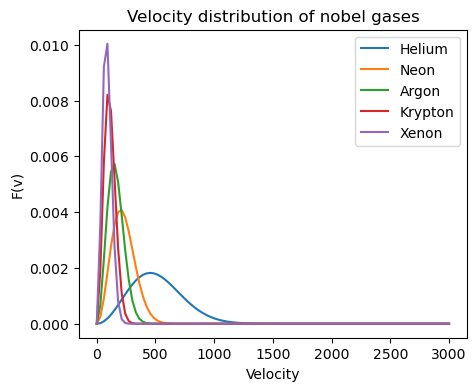

In [18]:
#Plotting: 

fig = plt.figure(figsize = (5,4))

plt.title('Velocity distribution of nobel gases')
plt.plot(velocity, elements_values[names[0]], label= names[0])
plt.plot(velocity, elements_values[names[1]], label= names[1])
plt.plot(velocity, elements_values[names[2]], label= names[2])
plt.plot(velocity, elements_values[names[3]], label= names[3])
plt.plot(velocity, elements_values[names[4]], label= names[4])

plt.xlabel("Velocity")
plt.ylabel("F(v)")

plt.legend()

plt.show()

#### Part F

In [19]:
elements_values150k = {'Helium':0. ,'Neon':0.,'Argon':0.,'Krypton':0.,'Xenon':0.}
elements_values293k = {'Helium':0. ,'Neon':0.,'Argon':0.,'Krypton':0.,'Xenon':0.}
elements_values500k = {'Helium':0. ,'Neon':0.,'Argon':0.,'Krypton':0.,'Xenon':0.}

In [20]:
#For temperature 500 : 
temperature_2 = 500 
velocity = np.array(np.linspace(0.,3000.,100))
for i in range(len(elements)):
    #Getting the value of the mass for each element
    mass = elements[names[i]]
    
    #Converting into an array the vector we get as output
    elements_values500k[names[i]] = np.array(Maxwell_Boltzman (mass,temperature_2,velocity))
    
#For temperature 150 :     
temperature_3 = 150 
for i in range(len(elements)):
    #Getting the value of the mass for each element
    mass = elements[names[i]]
    
    #Converting into an array the vector we get as output
    elements_values150k[names[i]] = np.array(Maxwell_Boltzman (mass,temperature_3,velocity))
    
#For temperature 293 :    
temperature_4 = 293 
for i in range(len(elements)):
    #Getting the value of the mass for each element
    mass = elements[names[i]]
    
    #Converting into an array the vector we get as output
    elements_values293k[names[i]] = np.array(Maxwell_Boltzman (mass,temperature_4,velocity))
    
    
#print(len(elements_values293k))
#print(len(elements_values150k))
#print(elements_values500k)

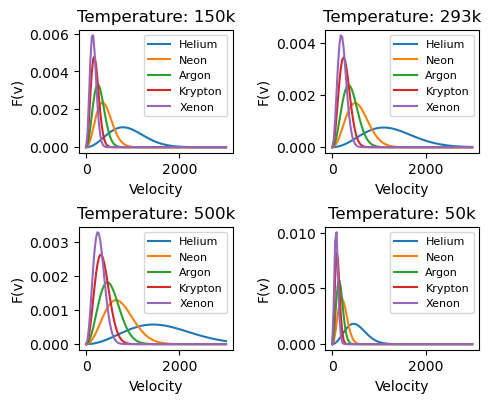

In [21]:
fig = plt.figure(figsize = (5,4))

#Plotting for temperature 500k
plt.subplot(2, 2, 3)
plt.title('Temperature: 500k')
plt.plot(velocity, elements_values500k[names[0]], label= names[0])
plt.plot(velocity, elements_values500k[names[1]], label= names[1])
plt.plot(velocity, elements_values500k[names[2]], label= names[2])
plt.plot(velocity, elements_values500k[names[3]], label= names[3])
plt.plot(velocity, elements_values500k[names[4]], label= names[4])
plt.xlabel("Velocity")
plt.ylabel("F(v)")
plt.legend(prop = {'size' : 8},loc = 'upper right')

#Plotting for temperature 150k
plt.subplot(2, 2, 1)
plt.title('Temperature: 150k')
plt.plot(velocity, elements_values150k[names[0]], label= names[0])
plt.plot(velocity, elements_values150k[names[1]], label= names[1])
plt.plot(velocity, elements_values150k[names[2]], label= names[2])
plt.plot(velocity, elements_values150k[names[3]], label= names[3])
plt.plot(velocity, elements_values150k[names[4]], label= names[4])
plt.xlabel("Velocity")
plt.ylabel("F(v)")
plt.legend(prop = {'size' : 8},loc = 'upper right')

#Plotting for temperature 293k
plt.subplot(2, 2, 2)
plt.title('Temperature: 293k')
plt.plot(velocity, elements_values293k[names[0]], label= names[0])
plt.plot(velocity, elements_values293k[names[1]], label= names[1])
plt.plot(velocity, elements_values293k[names[2]], label= names[2])
plt.plot(velocity, elements_values293k[names[3]], label= names[3])
plt.plot(velocity, elements_values293k[names[4]], label= names[4])
plt.xlabel("Velocity")
plt.ylabel("F(v)")
plt.legend(prop = {'size' : 8},loc = 'upper right')

#Plotting for temperature 50k
plt.subplot(2, 2, 4)
plt.title('Temperature: 50k')
plt.plot(velocity, elements_values[names[0]], label= names[0])
plt.plot(velocity, elements_values[names[1]], label= names[1])
plt.plot(velocity, elements_values[names[2]], label= names[2])
plt.plot(velocity, elements_values[names[3]], label= names[3])
plt.plot(velocity, elements_values[names[4]], label= names[4])
plt.xlabel("Velocity")
plt.ylabel("F(v)")
plt.legend(prop = {'size' : 8},loc = 'upper right')


#Adjusting the plots: 
plt.subplots_adjust(left=0.1,      #The code to adjust the plots was reovered from
                    bottom=0.1,    #www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=0.6)
plt.show()


## PROBLEM 3 

#### Part A

In [22]:
#Defining the solid angle function: 
def Solid_angle(radius,distance):
    '''
    The function evaluates the radius of the body and the avarage distance in the 
    solid angle equation
    INPUT: Recieves radius of Sun and avarage Earth-Sun distance
    OUTPUT: Returns the solid angle
    '''
    theta = 2*np.pi*(1 - np.sqrt(distance**2 - radius**2)/distance)
    
    return theta


#Checking the function works: 
radius = 699340
distance = 151.35*10**6
solid_angle = Solid_angle(radius, distance)

#Reporting the results:
print('The solid angle in [sr] units is',solid_angle)

The solid angle in [sr] units is 6.707552470074821e-05


#### Part B

In [23]:
#Reading the file: 
def read_csv(file):
    '''
    Reads the data of a given file and retunrs two numpy arryas containg the 
    data of the two first columns 
    INPUT:File name/rout
    OUTPUT: Returns the data of the two first columns as numpy arrays
    '''
    
    #Reading the file
    df = pd.read_csv(file)
    
    #Saving the two columns as arrays:
    wavelenght = np.array(df['Wavelength (nm)'])
    extra_t = np.array(df['Extraterrestrial W*m-2*nm-1'])   
    
    return wavelenght,extra_t



#Checking the function works: 
#file = '/home/jdiego/Downloads/AM0AM1_5.csv'
#wavelenght,extra_t = read_csv(file)
#print(extra_t)
#print(wavelenght)

#### Part C

SignificanceResult(statistic=-0.8982764088594438, pvalue=0.0) PearsonRResult(statistic=-0.746826953236407, pvalue=0.0)


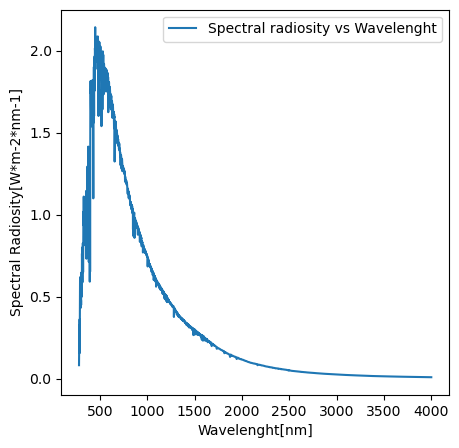

In [31]:
# calling the function: 
wavelenght, spectral = read_csv('/home/jdiego/Downloads/AM0AM1_5.csv')

#checking it works: 
#print(spectral)

#Spearman coefficient
sp = st.spearmanr(wavelenght, spectral)
#Pearson coefficient
pe = st.pearsonr(wavelenght, spectral)

#checkin the pearson and Spearman coefficient
print(sp,pe)


#Plotting: 
fig = plt.figure(figsize = (5,5))
plt.plot(wavelenght, spectral, label= 'Spectral radiosity vs Wavelenght')

plt.xlabel("Wavelenght[nm]")
plt.ylabel("Spectral Radiosity[W*m-2*nm-1]")

plt.legend()

plt.show()

#### Part D  

In [25]:
#Defining the function: 
def spectral_radiance(wavelenght,temperature): 
    '''
    The functions evaluates the wavelength and the temperature in the 
    Planck's law equation to obtaine the spectral radiance
    INPUT: wavelenght and temperature
    OUTPUT: Spectral radiosity 
    '''
    #Defining the constants:
    angle = solid_angle
    h = 6.62607015e-16  # h in nm
    k = 1.380649e-5     # K in nm 
    c = 3*10**(17)  # C in nm
    wavelenght = wavelenght
    #Defining the function:
    B = (2.0*h*(c**2))/((wavelenght**5)*(np.exp((h*c)/(wavelenght*k*temperature))-1.0))
    J = (B*angle)
    
    return J


#### Part E

In [26]:
#using curve_fit() to do the regression: 
coef, cova = opt.curve_fit(spectral_radiance,wavelenght,spectral,p0 = 5000)

#Reporting the temperature: 
print('The temperature of the Sun, using our fittig model is stimated to be: '+ str(coef[0])+'K')

The temperature of the Sun, using our fittig model is stimated to be: 5746.539086980315K


#### Part F

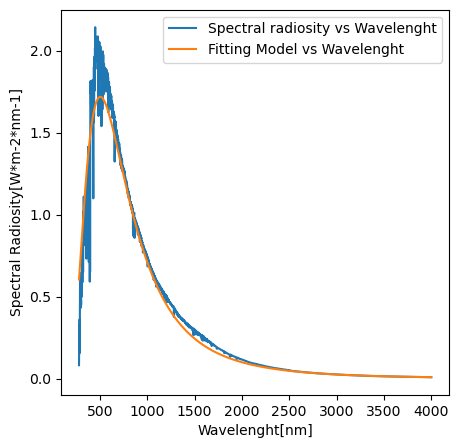

In [27]:
#Using the new coefficients: 
spectra_new = spectral_radiance(wavelenght,coef)

fig = plt.figure(figsize = (5,5))
plt.plot(wavelenght, spectral, label= 'Spectral radiosity vs Wavelenght')
plt.plot(wavelenght, spectra_new, label= 'Fitting Model vs Wavelenght')

plt.xlabel("Wavelenght[nm]")
plt.ylabel("Spectral Radiosity[W*m-2*nm-1]")

plt.legend()

plt.show()

#### Part G

In [28]:
#Defining the new function : 
def clasical (wavelenght,temperature):
    '''
    The function evaluates the wavenlenght and temperatures in the classical 
    black body radiation equation 
    INPUT: Recives wavelenght array and temperature
    OUTPUT: Returns clasical Spectral radiosity 
    '''
    angle = 6.707552470074821e-5
    c = 3*10**(17)
    k = 1.380649e-5   #converted to nm
    #defining B_lambda:
    B = (2*c*k*temperature)/(wavelenght)**4
    J = B*angle
    
    return J

In [29]:
classical_spectra = clasical(wavelenght,coef)

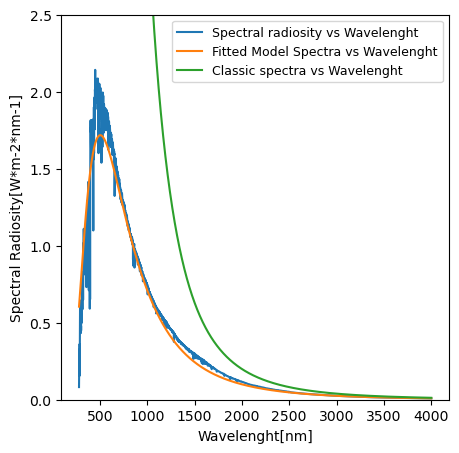

In [30]:
fig = plt.figure(figsize = (5,5))
plt.plot(wavelenght, spectral, label= 'Spectral radiosity vs Wavelenght')
plt.plot(wavelenght, spectra_new,label= 'Fitted Model Spectra vs Wavelenght')
plt.plot(wavelenght, classical_spectra, label= 'Classic spectra vs Wavelenght')

plt.xlabel("Wavelenght[nm]")
plt.ylabel("Spectral Radiosity[W*m-2*nm-1]")
plt.ylim(0,2.5)
plt.legend(prop = {'size' : 9},loc = 'upper right')

plt.show()